In [46]:
# Cargando las bibliotecas
import numpy as np
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from util import plot_decision_regions
import matplotlib.pyplot as plt

In [40]:
ds = datasets.load_iris()
X, y = ds.data, ds.target
clf = MLPClassifier(activation='tanh',solver='sgd', learning_rate_init=0.01, hidden_layer_sizes=(3, 3), max_iter=10000, random_state=1)
clf.fit(X, y) 

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 3), learning_rate='constant',
       learning_rate_init=0.01, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [41]:
# Haciendo pruebas
indexes = np.random.randint(len(X),size=10)
X_test = X[indexes]
y_test = y[indexes]
print("Expected")
print(y_test)
res = clf.predict(X_test)
print("Obtained")
print(res)
# Calcula el score mean accuracy
clf.score(X_test,y_test)

Expected
[2 1 2 0 1 0 1 2 2 1]
Obtained
[2 1 2 0 1 0 1 2 2 1]


1.0

In [42]:
# Verificacion de las matrices de pesos
[coef.shape for coef in clf.coefs_]
for coef in clf.coefs_:
    print(coef)

[[-0.15802683  0.23876805 -0.92558325]
 [-0.3689396   0.37037678 -0.75482158]
 [-0.58229048 -0.50305492 -0.19114461]
 [ 0.071643   -0.79026781  0.34295028]]
[[ 0.4874856  -0.13458719 -0.15260861]
 [-2.39707094 -2.14664573  1.08130259]
 [ 1.08425856 -0.33809729  0.11369883]]
[[-2.06368811 -1.35945378  2.5972202 ]
 [-2.5791386   0.89729888  1.63652895]
 [ 0.94149927 -0.09749809 -0.76288738]]


## Visualizando las regiones

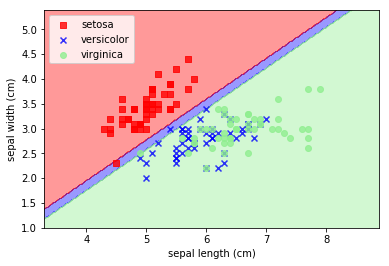

In [51]:
X, y = ds.data[:,:2], ds.target

clf = MLPClassifier(solver='sgd', hidden_layer_sizes=(2,4,2), max_iter=10000, random_state=1)
clf.fit(X, y)

plot_decision_regions(X, y, classifier=clf,ds=ds)
plt.xlabel(ds.feature_names[0])
plt.ylabel(ds.feature_names[1])
plt.legend(loc='upper left')
plt.show()